#Traffic flow predction

**Traffic Prediction Dataset**

---
The dataset focuses on traffic congestion in urban areas.
This dataset offers valuable insights for transportation planning, infrastructure development, and congestion management, enabling stakeholders to make informed decisions that enhance urban mobility and contribute to sustainable city planning.
Updated every 15 minutes over one month, the dataset provides a comprehensive view of traffic patterns.

 It includes a traffic situation column with four categories:
 Heavy,High, Normal, and Low, which helps assess congestion severity.

 The dataset consists of 18 columns: 12 integer, 4 string, and 2 DateTime.


#Task 1: Project Idea Selection and Dataset Collection
- Choose a traffic-related project (e.g., traffic sign recognition, vehicle
detection, traffic flow analysis). (Done by the group)
- Gather the data either by obtaining an existing dataset or by scraping data
online.(Done by the group)
- Store the collected data in a database (e.g., SQLite, MongoDB).(Rana)
- Explore the dataset and understand its structure.(Dana)
- Perform data preprocessing steps such as resizing, normalization, and data
augmentation.(Dana)
- Split the dataset into training, validation, and test sets (Retaj)

##Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

##Load the Data:

In [2]:
!kaggle datasets download -d hasibullahaman/traffic-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset
License(s): other
  0% 0.00/83.1k [00:00<?, ?B/s]
100% 83.1k/83.1k [00:00<00:00, 37.7MB/s]


In [3]:
!unzip traffic-prediction-dataset.zip

Archive:  traffic-prediction-dataset.zip
  inflating: Traffic.csv             
  inflating: TrafficTwoMonth.csv     


In [4]:
traffic_df=pd.read_csv('/content/Traffic.csv')
traffic_two_month_df=pd.read_csv('/content/TrafficTwoMonth.csv')

#EDA:

#First dataset :

In [5]:
#explore the data
traffic_two_month_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [6]:
#explore the data
traffic_two_month_df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal
5951,11:45:00 PM,9,Thursday,14,3,1,15,33,low


In [7]:
#explore the data
traffic_two_month_df.shape

(5952, 9)

In [8]:
#explore the datatypes
traffic_two_month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


###cleaning the dataset


In [9]:
#checking for null values
traffic_two_month_df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [10]:
# checking for duplicated
traffic_two_month_df.duplicated().sum()

0

In [11]:
traffic_two_month_df['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,3610
heavy,1137
low,834
high,371


#visualization the dataset

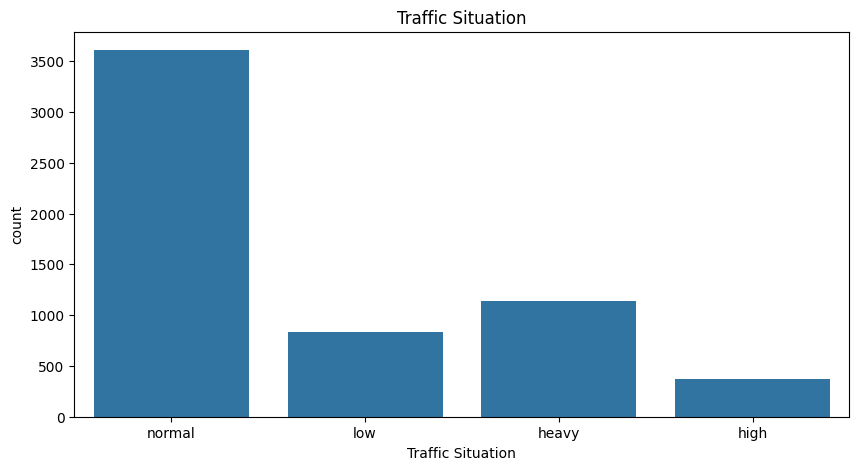

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=traffic_two_month_df['Traffic Situation'])
plt.title('Traffic Situation')
plt.show()

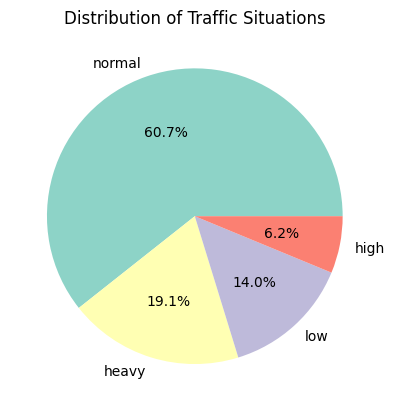

In [13]:
traffic_two_month_df['Traffic Situation'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Traffic Situations')
plt.ylabel('')
plt.show()


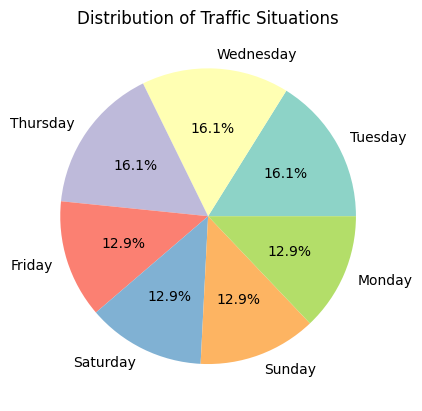

In [14]:
traffic_two_month_df['Day of the week'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Traffic Situations')
plt.ylabel('')
plt.show()

<ipython-input-15-56faa94b4900>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day of the week', y='Total', data=traffic_two_month_df, ci=None)


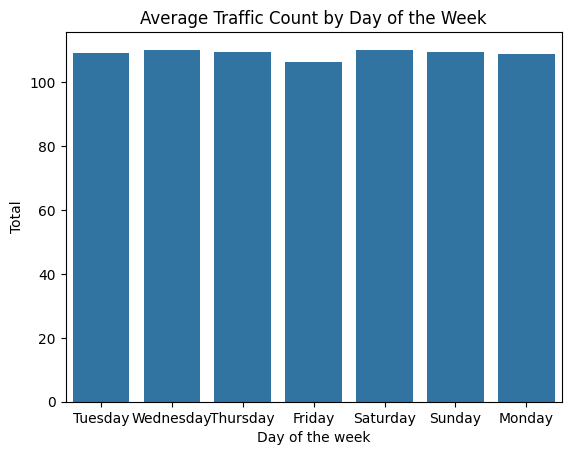

In [15]:
sns.barplot(x='Day of the week', y='Total', data=traffic_two_month_df, ci=None)
plt.title('Average Traffic Count by Day of the Week')
plt.show()

In [16]:

num_df=traffic_two_month_df.select_dtypes(include=['int64'])

In [17]:
num_df.drop(num_df[['Date','TruckCount','CarCount']],axis=1, inplace=True)


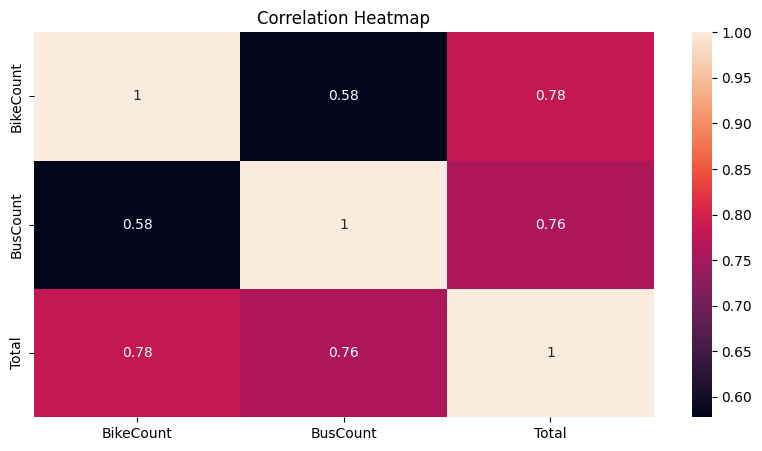

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(num_df.corr(), annot=True  )
plt.title('Correlation Heatmap')
plt.show()

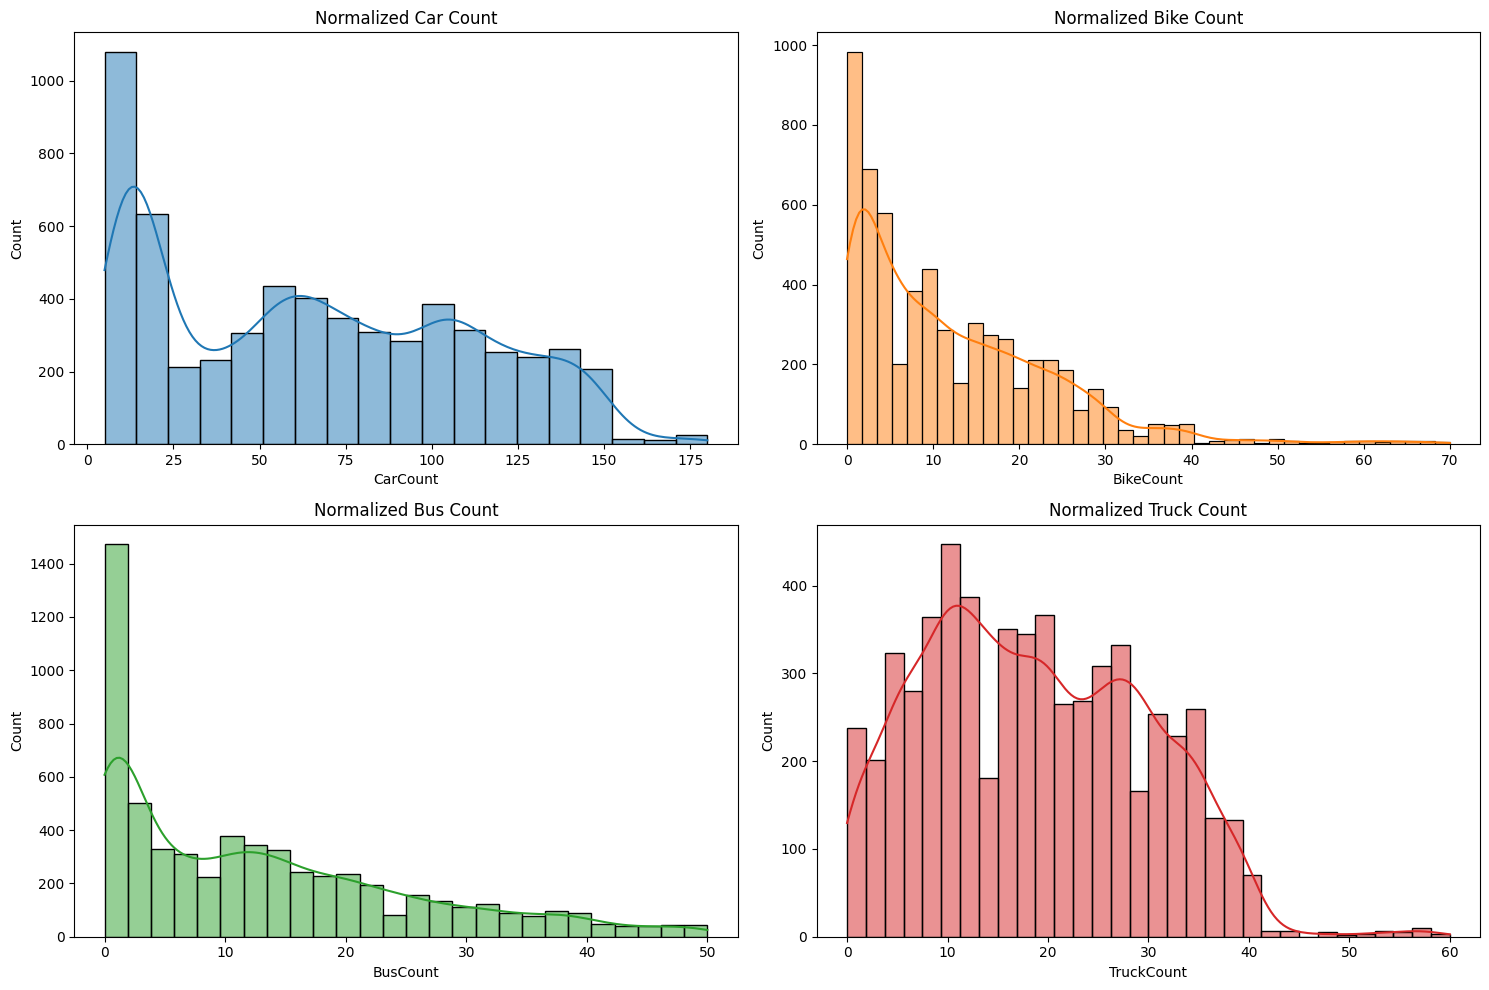

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(traffic_two_month_df['CarCount'], ax=axes[0, 0], kde=True, color='#1f77b4')
sns.histplot(traffic_two_month_df['BikeCount'], ax=axes[0, 1], kde=True, color='#ff7f0e')
sns.histplot(traffic_two_month_df['BusCount'], ax=axes[1, 0], kde=True, color='#2ca02c')
sns.histplot(traffic_two_month_df['TruckCount'], ax=axes[1, 1], kde=True, color='#d62728')
axes[0, 0].set_title('Normalized Car Count')
axes[0, 1].set_title('Normalized Bike Count')
axes[1, 0].set_title('Normalized Bus Count')
axes[1, 1].set_title('Normalized Truck Count')
plt.tight_layout()
plt.show()

#Second dataset

In [20]:
#explore the dataset
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [21]:
#explore the dataset
traffic_df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal
2975,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


In [22]:
#explore the dataset
traffic_df.shape

(2976, 9)

In [23]:
#explore the datatypes
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


###cleaning the dataset


In [24]:
#checking for null values
traffic_df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [25]:
#check for duplicates
traffic_df.duplicated().sum()

0

#visualization the dataset

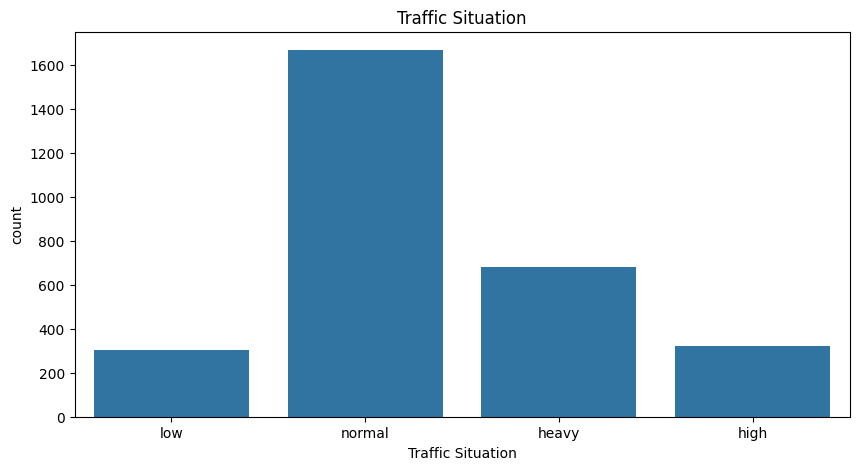

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=traffic_df['Traffic Situation'],data=traffic_df)
plt.title('Traffic Situation')
plt.show()

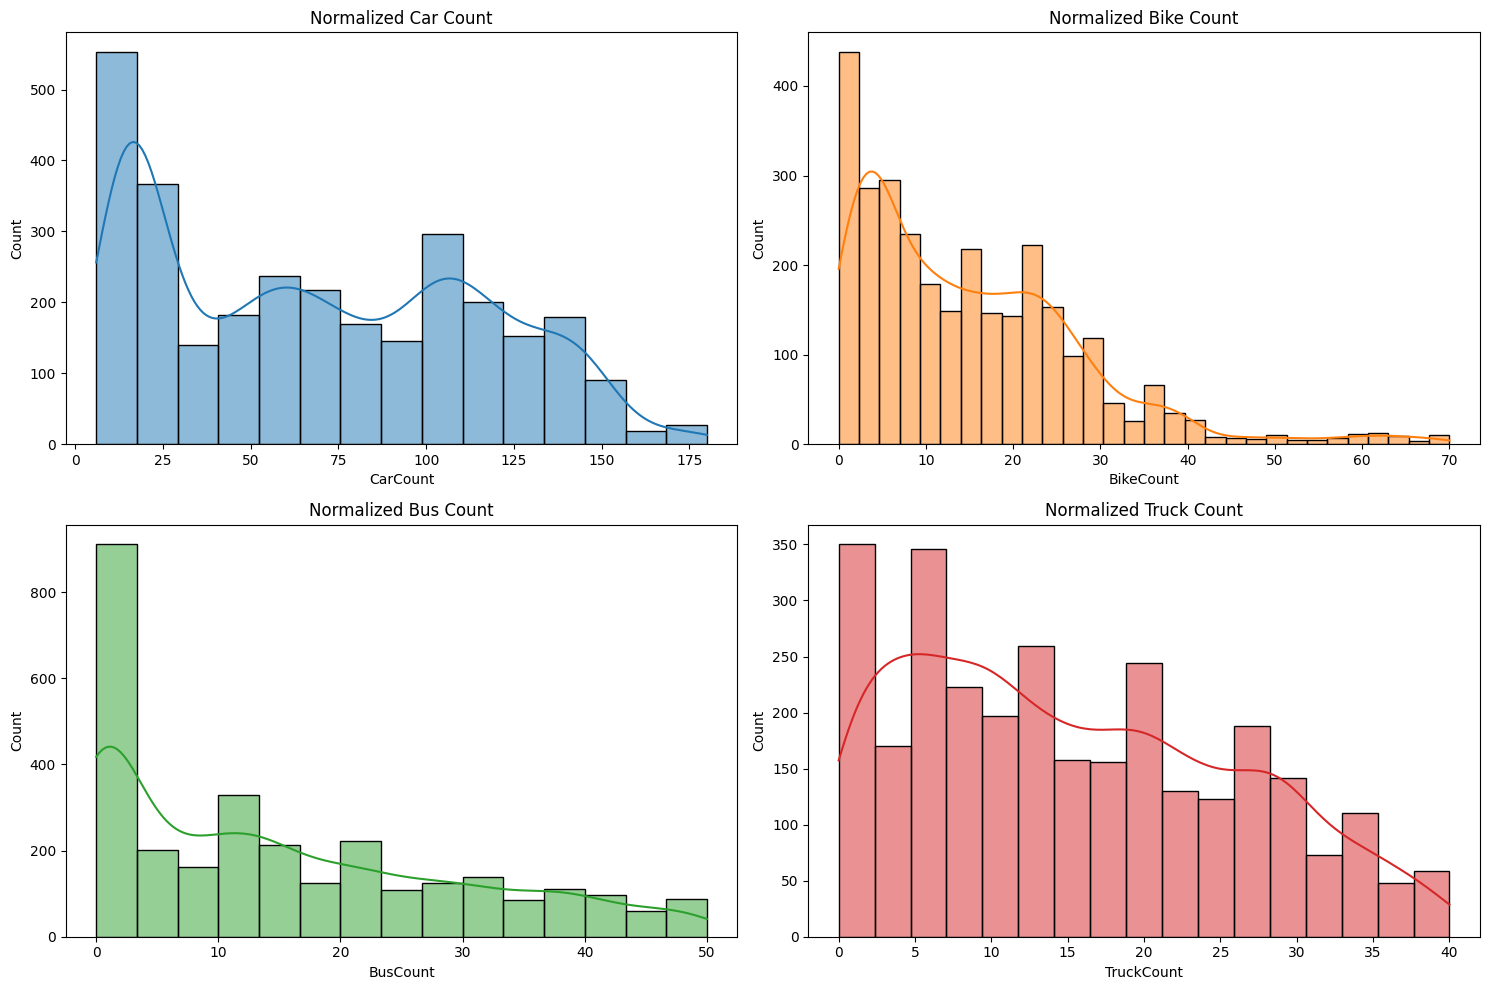

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(traffic_df['CarCount'], ax=axes[0, 0], kde=True, color='#1f77b4')
sns.histplot(traffic_df['BikeCount'], ax=axes[0, 1], kde=True, color='#ff7f0e')
sns.histplot(traffic_df['BusCount'], ax=axes[1, 0], kde=True, color='#2ca02c')
sns.histplot(traffic_df['TruckCount'], ax=axes[1, 1], kde=True, color='#d62728')
axes[0, 0].set_title('Normalized Car Count')
axes[0, 1].set_title('Normalized Bike Count')
axes[1, 0].set_title('Normalized Bus Count')
axes[1, 1].set_title('Normalized Truck Count')
plt.tight_layout()
plt.show()

In [28]:
num_df2=traffic_df.select_dtypes(include=['int64'])

In [29]:
num_df2.drop(num_df2[['Date','TruckCount']],axis=1, inplace=True)


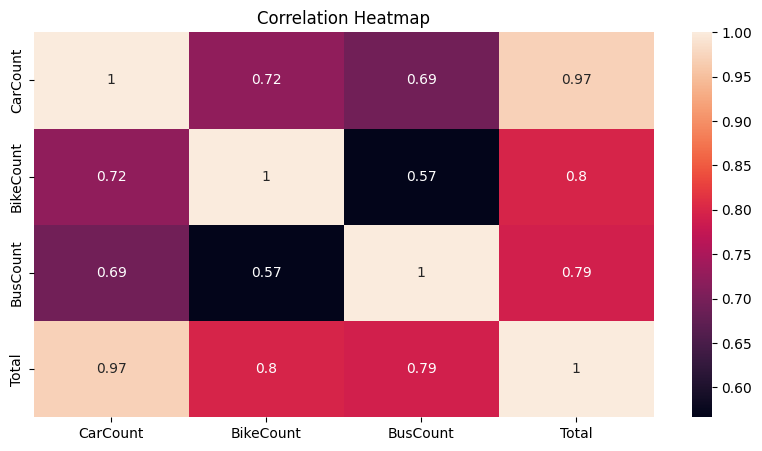

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(num_df2.corr(), annot=True  )
plt.title('Correlation Heatmap')
plt.show()

#Merging 2 Dataset


In [31]:
merged_data = pd.merge(traffic_df, traffic_two_month_df)

In [32]:
merged_data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:15:00 AM,10,Tuesday,44,0,5,4,53,low


In [33]:
merged_data['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,1421
heavy,682
low,304
high,197


# LabelEncoder

In [34]:
le_traffic = LabelEncoder()
le_day = LabelEncoder()
le_time = LabelEncoder()
# Fit and transform each column separately with its own encoder
le_traffic.fit(merged_data['Traffic Situation'])
merged_data['Traffic Situation'] = le_traffic.transform(merged_data['Traffic Situation'])

le_day.fit(merged_data['Day of the week'])
merged_data['Day of the week'] = le_day.transform(merged_data['Day of the week'])

le_time.fit(merged_data['Time'])
merged_data['Time'] = le_time.transform(merged_data['Time'])

In [35]:
print(merged_data)

      Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0       16    10                5        31          0         4           4   
1       18    10                5        49          0         3           3   
2       20    10                5        46          0         3           6   
3       22    10                5        51          0         2           5   
4       26    10                5        44          0         5           4   
...    ...   ...              ...       ...        ...       ...         ...   
2599     5     9                4        11          4         0          23   
2600     7     9                4        16          3         1          36   
2601     9     9                4        11          0         1          30   
2602    11     9                4        15          4         1          25   
2603    13     9                4        16          5         0          27   

      Total  Traffic Situation  
0     

#Stnader Scaling for X_traine and x_test

In [36]:
Scaler=StandardScaler()
df=pd.DataFrame(merged_data)
print(df)

      Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0       16    10                5        31          0         4           4   
1       18    10                5        49          0         3           3   
2       20    10                5        46          0         3           6   
3       22    10                5        51          0         2           5   
4       26    10                5        44          0         5           4   
...    ...   ...              ...       ...        ...       ...         ...   
2599     5     9                4        11          4         0          23   
2600     7     9                4        16          3         1          36   
2601     9     9                4        11          0         1          30   
2602    11     9                4        15          4         1          25   
2603    13     9                4        16          5         0          27   

      Total  Traffic Situation  
0     

#Split the Merged Data into Train and test

---



In [37]:
X = merged_data.drop('Traffic Situation', axis=1)
y = merged_data['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
merged_data.sample(5)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
1663,63,29,3,117,10,47,9,183,0
561,37,16,1,105,30,24,8,167,3
2225,23,5,3,21,8,4,28,61,3
812,27,19,4,18,16,32,18,84,3
1009,9,21,3,20,4,1,26,51,3


In [102]:
merged_data.shape

(2604, 9)

In [101]:
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
# Add hidden layer

model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))

# Add output layer
model.add(Dense(units=4, activation='softmax'))  # Adjust the number of units

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#Training the model

In [95]:
model.fit(X_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5466 - loss: 2.6800
Epoch 2/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7720 - loss: 0.6964
Epoch 3/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8172 - loss: 0.5793
Epoch 4/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7929 - loss: 0.5611
Epoch 5/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8284 - loss: 0.4885
Epoch 6/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8110 - loss: 0.4964
Epoch 7/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8340 - loss: 0.4628
Epoch 8/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8147 - loss: 0.4709
Epoch 9/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8269 - loss: 0.4559
Epoch 10/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8292 - loss: 0.4513
Epoch 11/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8326 - loss: 0.4477
Epoch 12/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



#Model Summry

In [96]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 6)                   │             198 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,670 (6.53 KB)

 Trainable params: 556 (2.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,114 (4.36 KB)

#Model evaluation

In [97]:
model.evaluate(X_test, y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.3859  


[0.35904693603515625, 0.8694817423820496]

#Predict the Model

In [86]:
#here we predict the model and check for the accurcy and recall with classification_report method
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


#Eveluating the Model

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       133
           1       0.79      0.85      0.81        39
           2       0.98      0.97      0.98        67
           3       0.98      0.98      0.98       282

    accuracy                           0.96       521
   macro avg       0.93      0.93      0.93       521
weighted avg       0.96      0.96      0.96       521

[[125   5   0   3]
 [  5  33   0   1]
 [  0   0  65   2]
 [  1   4   1 276]]


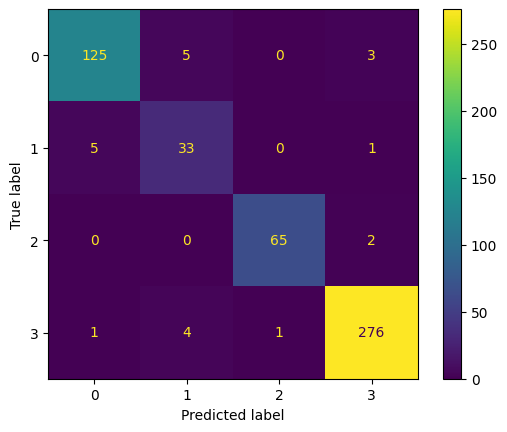

In [87]:
#here we disply confusion_matrix and classification_report with the plot

print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes)
plt.show()

#Drawing Plot to show Accurcy and Recall

Epoch 1/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9599 - loss: 0.1178 - val_accuracy: 0.9616 - val_loss: 0.1198
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9370 - loss: 0.1614 - val_accuracy: 0.9448 - val_loss: 0.1545
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9490 - loss: 0.1357 - val_accuracy: 0.9305 - val_loss: 0.2046
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9552 - loss: 0.1455 - val_accuracy: 0.9329 - val_loss: 0.2106
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.2112 - val_accuracy: 0.9400 - val_loss: 0.1680
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9525 - loss: 0.1267 - val_accuracy: 0.9089 - val_loss: 0.2416
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.1916 - val_accuracy: 0.9353 - val_loss: 0.1781
Epoch 8/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9482 - loss: 0.1490 - val_accuracy: 0.

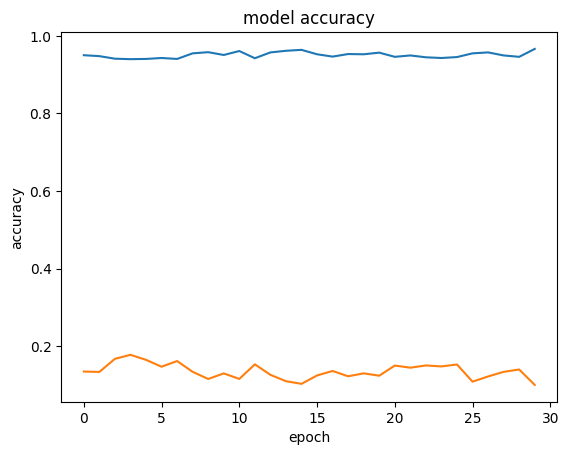

In [89]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

#